sklearn.preprocessing 서브모듈의 PolynomialFeatures 클래스 사용  

+ 다항특징변환 : 차수를 지정하고, 입력을 fit_transform() 메소드에 넘기면 다항회귀에 필요한 형태로 변환한다.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

url = 'https://github.com/dknife/ML/raw/main/data/'
data = pd.read_csv(url + 'life_expectancy.csv')
data.dropna(inplace=True)

X = data[['Life expectancy', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = data['Life expectancy']

X

,Life expectancy,Percentage expenditure,Polio,BMI,GDP,Thinness 1-19 years
0,65.0,71.279624,6.0,19.1,584.259210,17.2
1,59.9,73.523582,58.0,18.6,612.696514,17.5
2,59.9,73.219243,62.0,18.1,631.744976,17.7
3,59.5,78.184215,67.0,17.6,669.959000,17.9
4,59.2,7.097109,68.0,17.2,63.537231,18.2
...,...,...,...,...,...,...
2933,44.3,0.000000,67.0,27.1,454.366654,9.4
2934,44.5,0.000000,7.0,26.7,453.351155,9.8
2935,44.8,0.000000,73.0,26.3,57.348340,1.2
2936,45.3,0.000000,76.0,25.9,548.587312,1.6


In [69]:
for n in range(1, 11):
    poly_features = PolynomialFeatures(degree=n)   #n차 다항식을 위한 입력으로 변환
    poly_X = poly_features.fit_transform(X)
    print(f'degree={n}일 때 X.shape : {poly_X.shape}')
#다항식의 차수가 높아질수록 입력의 크기가 폭발적으로 증가한다.

degree=1일 때 X.shape : (1649, 7)
degree=2일 때 X.shape : (1649, 28)
degree=3일 때 X.shape : (1649, 84)
degree=4일 때 X.shape : (1649, 210)
degree=5일 때 X.shape : (1649, 462)
degree=6일 때 X.shape : (1649, 924)
degree=7일 때 X.shape : (1649, 1716)
degree=8일 때 X.shape : (1649, 3003)
degree=9일 때 X.shape : (1649, 5005)
degree=10일 때 X.shape : (1649, 8008)


훈련데이터 MSE : 0.0033209908529288107
검증데이터 MSE : 0.3099321140340187


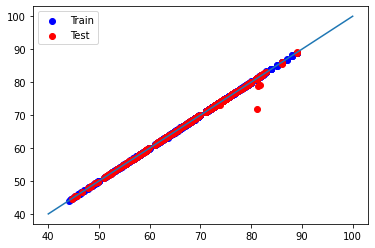

In [70]:
from random import random


poly_features = PolynomialFeatures(degree=3)
poly_X = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=2, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'훈련데이터 MSE : {mse(y_train, y_train_pred)}')
print(f'검증데이터 MSE : {mse(y_test, y_test_pred)}')
plt.scatter(y_train, y_train_pred, color='b', label='Train')
plt.scatter(y_test, y_test_pred, color='r', label='Test')
plt.plot([40, 100], [40, 100])
plt.legend();

검증데이터의 MSE가 훈련데이터에 비해 높은 값을 가지고  
정답선에서 벗어난 빨간점이 확인되는 것으로 보아,  
모델이 훈련용 데이터에 과적합되었다고 볼 수 있다.  
=> 차수가 높아질수록 입력데이터의 크기가 폭발적으로 증가하며, 과적합도 심해진다.

### Quiz.
직선으로 표현하기 어려운 데이터를 화면에 그려보고, 데이터를 설명하는 회귀함수를 다항회귀를 이용해 찾아보자.  
그리고 회귀함수를 데이터의 독립변수 범위 내에서 가시화해보아라.

          x         y
0  0.034794  0.342989
1  0.053759 -0.156204
2  0.049323 -0.476218


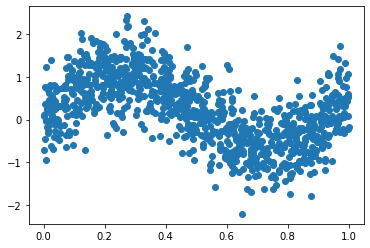

In [71]:
url = 'https://github.com/dknife/ML/raw/main/data/nonlinear.csv'
data = pd.read_csv(url)

print(data[:3])
plt.scatter(data['x'], data['y']);

In [79]:
X = data['x'].to_numpy()                    #(1000,)
y = data['y'].to_numpy()                    #(1000,)

X = X.reshape(-1, 1)                        #(1000, 1)

poly_features = PolynomialFeatures(degree=3)
X_degree3 = poly_features.fit_transform(X)  #(1000, 4)

((1000, 1), (1000, 4))

In [80]:
import numpy as np

model_1 = LinearRegression()
model_3 = LinearRegression()

model_1.fit(X, y)
model_3.fit(X_degree3, y)

LinearRegression()

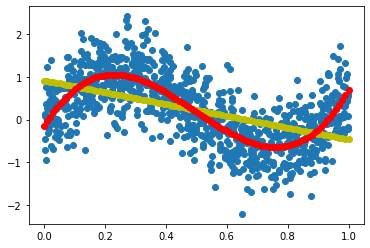

In [81]:
#회귀함수를 그릴 때 사용할 x의 범위
x_for_line = np.linspace(0, 1, 100)       #0~1 사이를 균일한 간격으로 100개 채움(100, )
X_for_line = x_for_line.reshape(-1, 1)    #(100, 1)
X_for_line_degree3 = poly_features.fit_transform(X_for_line)  #(100, 4)

pred = model_1.predict(X_for_line)
pred_degree3 = model_3.predict(X_for_line_degree3)                   

plt.scatter(data['x'], data['y'])
plt.scatter(X_for_line, pred, color='y', label='degree=1')
plt.scatter(x_for_line, pred_degree3, color='r', label='degree=3');